# PROBLEM STATEMENT

Dream Housing Finance company deals in all Home loans. They have Presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and Others. To automate this process, they have given a problem to identify the customers segments, thise are eligible for loan amount so that they can specifically target these customers.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
warnings.filterwarnings("ignore")

Loading dataset;

*Training dataset for training the model and,

*Test dataset for applying the model to predict the target variable

In [3]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
#CREATING A COPY OF THE DATASET SO AS NOT TO LOSE THE ORIGINAL DATASET AS A RESULT OF CHANGES
train_original = train.copy()
test_original = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


  From Below we can see that the Training data has 614 rows and 13 columns (Including Loan Status(TARGET VARIABLE)) while the Testing data has 367 rows and 12 columns (excluding the Loan Status in the Training data).

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the DataFrame Descriptions, we can see from the Count that LoanAmount and CreditHistory have missing values. This will be treated later

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# Exploratory Data Analysis

                                           UNIVARIATE ANALYSIS

Target Variable

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The Loan of 422 (around 69%) people out of 614 was approved

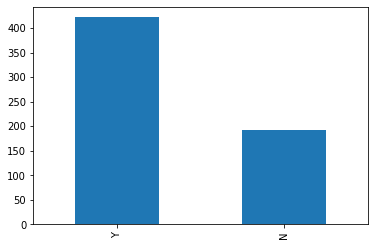

In [14]:
train['Loan_Status'].value_counts().plot.bar()

From the Dataset we can identify Three different types of variables.
*Nominal features >>> Gender, Married, Self_Employed, Credit_History and Loan_Status
*Ordinal features >>> Dependents, Education and Property_Area
*Numerical features >>> ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term

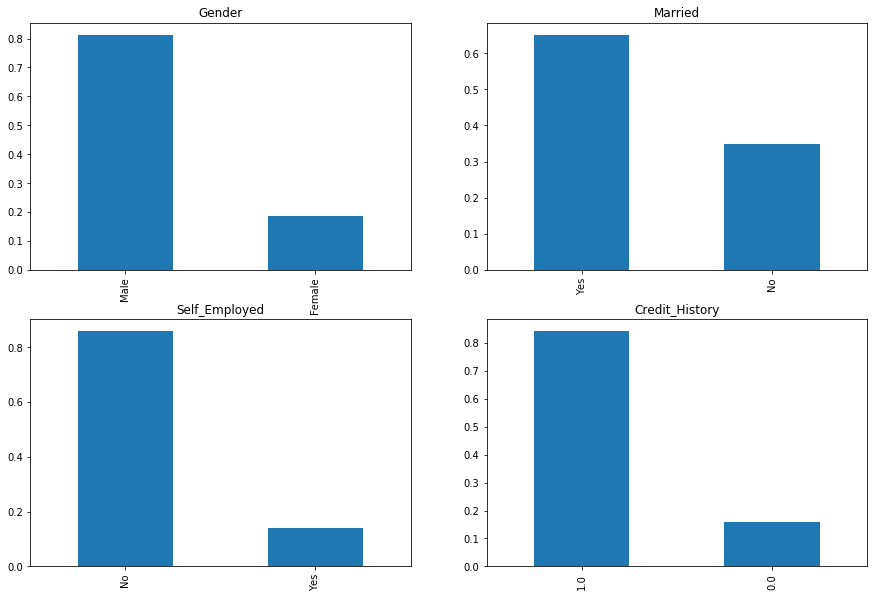

In [15]:
#VISUALISING THE NOMINAL FEATURES
fig, axe = plt.subplots(2,2)
train['Gender'].value_counts(normalize = True).plot.bar(ax = axe[0,0], figsize=(15,10), title = 'Gender')
train['Married'].value_counts(normalize = True).plot.bar(ax = axe[0,1], title = 'Married')
train['Self_Employed'].value_counts(normalize = True).plot.bar(ax = axe[1,0], title = 'Self_Employed')
train['Credit_History'].value_counts(normalize = True).plot.bar(ax = axe[1,1], title = 'Credit_History')
plt.show()

From the Graph above we can make the following Inferences on the Nominal features:
1. 80% of applicants are MALE,
2. Around 65% of applicants are MARRIED,
3. Around 15% of applicants are Self Employed and
3. Around 85% of applicants have repaid their debts.

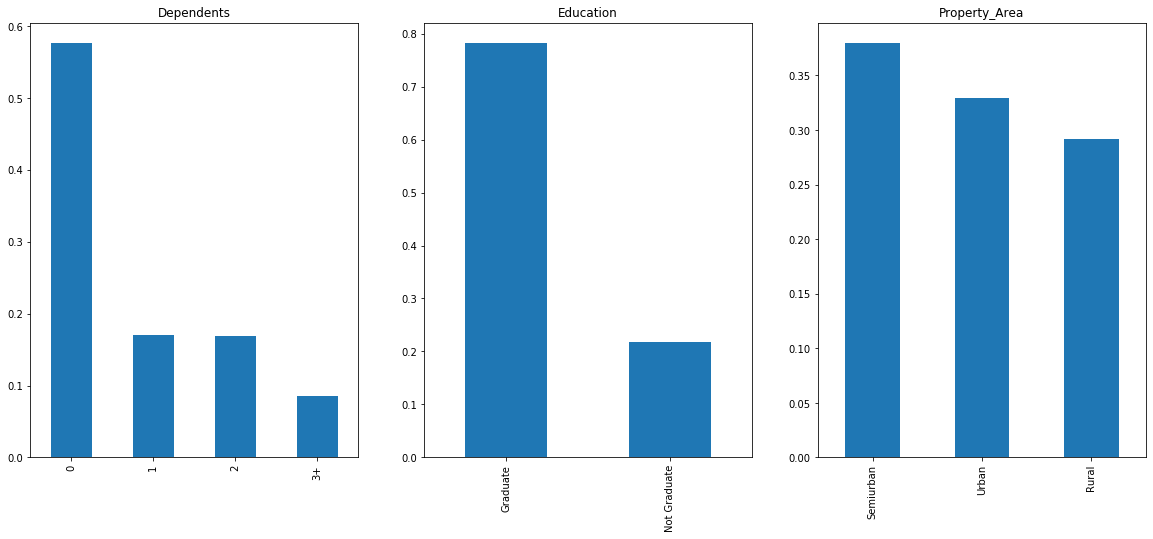

In [16]:
#VISUALISING THE ORDINAL FEATURES
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(20,8), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

From the Graph above we can make the following Inferences on the Ordinal Features:
1. Most applicants don't have any dependent,
2. Around 80% of applicants are Graduate and
3. Most applicants are from SemiUrban areas.


In [17]:
train['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

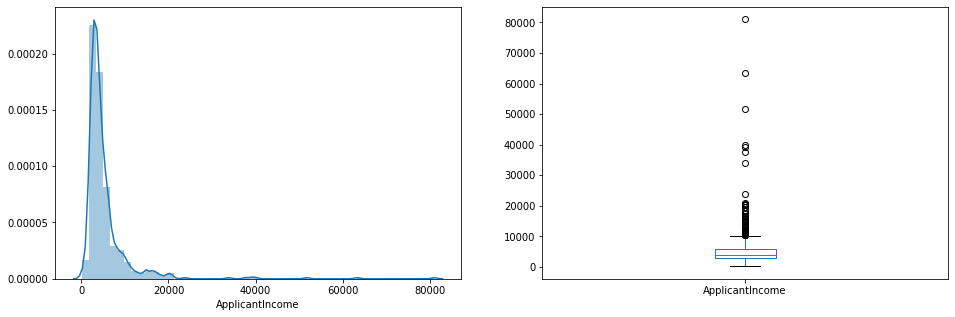

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

The Graph is skewed to the Left which shows it is not Normally Distributed.
We can see the Presence of OUTLIERS/Extreme Values from the two plots.

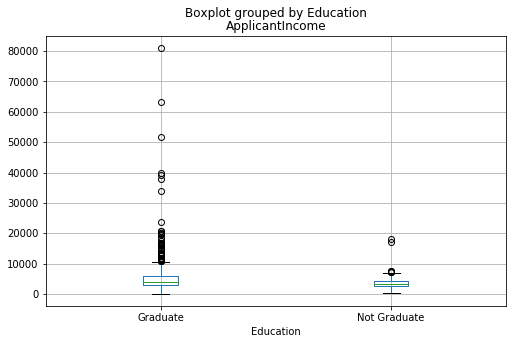

In [19]:
train.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (8, 5))
plt.show()

This Graph represents the Community standard that a Graduate should be Paid more than a Non-graduate.
Here we can see an higher number of Graduates with high Income appears to be the Outlier.

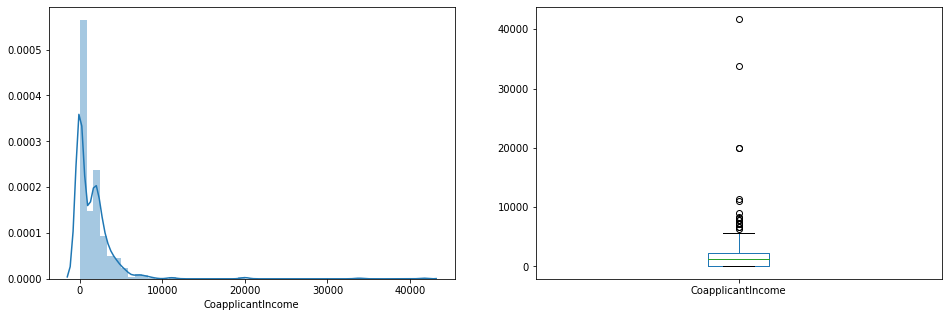

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

The CoapplicantIncome has similar distribution as that of ApplicantIncome.
Most Applicants Income ranges from 0 to 50000. We can also see Outliers.

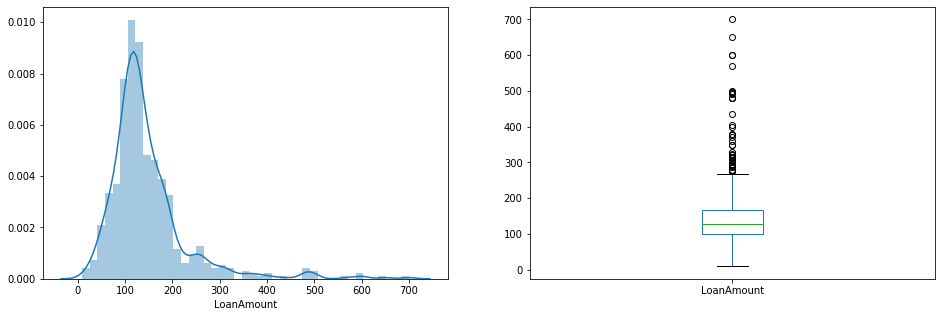

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

We See similiar Outliers in LoanAmount


                                            BIVARIATE ANALYSIS

The NULL Hypotheses for this Analysis are:


H0: Applicants with High Income should have more chances of Loan approval


H01: Applicants who have repaid their previous debts should have higher chances of Loan approval


H02: Loan Approval should depend on the Loan Amount

        H0: Applicants with High Income should have more chances of Loan approval

In [22]:
#Creating a Sequence
bin = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bin, labels = group)
train['Income_bin'].head()

0       High
1       High
2    Average
3    Average
4       High
Name: Income_bin, dtype: category
Categories (4, object): [Low < Average < High < Very High]

In [23]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


In [24]:
Income_normalised = Income_bin.div(Income_bin.sum(1).astype(float), axis = 0)
Income_normalised

Loan_Status,N,Y
Income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very High,0.335766,0.664234


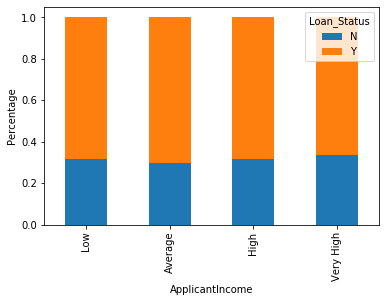

In [25]:
Income_normalised.plot(kind = 'bar', stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

Reject Null Hypothesis:


It can be Infered that Applicant Income does not affect Loan Approval.

                H01: Applicants who have repaid their previous debts should have higher chances of Loan approval

In [26]:
credit_status = pd.crosstab(train['Credit_History'], train['Loan_Status'])
credit_status

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [27]:
status_normalised = credit_status.div(credit_status.sum(1).astype(float), axis = 0)
status_normalised

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


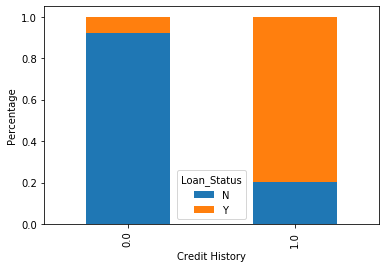

In [28]:
status_normalised.plot(kind = 'bar', stacked = True)
plt.xlabel('Credit History')
plt.ylabel('Percentage')
plt.show()

Accept Null Hypothesis:
    
We can Infer from the Above Graph that applicants that have paid their previous debts are eligible for Loan Amount.

        H02: Loan Approval should depend on the Loan Amount

In [29]:
#Creating a sequence
bin = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bin, labels = group)
train['LoanAmount_bin'].head()

0        NaN
1    Average
2        Low
3    Average
4    Average
Name: LoanAmount_bin, dtype: category
Categories (3, object): [Low < Average < High]

In [30]:
Loan_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
Loan_bin

Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,103,255
High,31,49


In [31]:
loan_normalised = Loan_bin.div(Loan_bin.sum(1).astype(float), axis = 0)
loan_normalised

Loan_Status,N,Y
LoanAmount_bin,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500


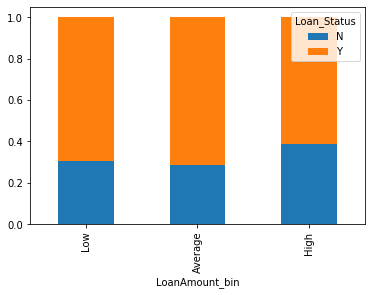

In [32]:
loan_normalised.plot(kind = 'bar', stacked = True)
plt.show()

Accept Null Hypothesis:

We can Infer from the Graph that the lower the Loan Amount the chances of receiving Loan Approval

An Overview Analysis Using Correlation

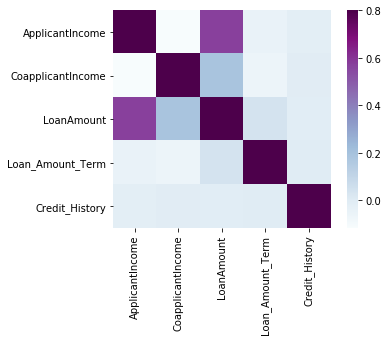

In [33]:
matrix = train.corr()
axe = sns.heatmap(matrix, vmax =.8, square = True, cmap = "BuPu", )
plt.show()

In [34]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


MISSING VALUES AND OUTLIER TREATMENT

In [35]:
train.drop(columns = 'LoanAmount_bin', inplace = True)
train.drop(columns = 'Income_bin', inplace = True)
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The above is the Count of Missing values in each Columns.

NOTE:
    
    In Filling Missing Values we can consider these methods;
    For Numerical Variables >>> Imputation using mean or median
    
    For Categorical Variables >>> Imputation using mode.

Categorical Variables

In [36]:
#This replaces all Nan values with the mode of the Column.
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)

In [37]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace= True)
test['Married'].fillna(test['Married'].mode()[0], inplace= True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace= True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace= True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace= True)

In [38]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

From Above we can see that the Categorical Variables have been filled with the mode of each column.

Numerical Variables

In [40]:
#This replaces all Nan values with the mode of the Column.
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)
#Loan_AmountTerm has a repeating values so the mode will be a better method to use
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

#Loan_AmountTerm has a repeating values so the mode will be a better method to use
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace= True)
#This replaces all Nan values with the mode of the Column.
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace= True)

In [41]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All Nan Values have been filled with either the median or mode of the columns.

Treating OUTLIERS

Outliers often have a significant effect on the mean and standard deviation and hence the distribution.

One way of treating Outliers is by finding the log of the values. If we take the Log transformation, it won't affect the smaller values much, it reduces the larger values, so that we can get a distribution similar to normal distribution.

From the analysis done above, LoanAmount and ApplicantIncome Column appears to contain Outliers. So to normally distribute the data, I wil take the log of the values.

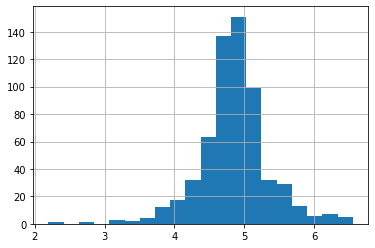

In [42]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

                                                   MODEL BUILDING

# Linear Regression Model

ONE-HOT ENCODING

In [43]:
#dropping Loan Id, because it is not relevant to our target variable Loan Status
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [44]:
#Creating a variable containing all Independent Variables and the Target variable
x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

In [45]:
X = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [46]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [47]:
#splitting dataset
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [48]:
model = LogisticRegression()
model.fit(x_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_cv = model.predict(x_cv)

In [50]:
#Calculating the Accuracy of Prediction
accuracy_of_prediction = accuracy_score(y_cv, pred_cv)
"Accuracy of Prediction is {}". format(accuracy_of_prediction)

'Accuracy of Prediction is 0.8162162162162162'

So the Accuracy of the Prediction is around 82%.

In [51]:
#LOADING PREDICTION FOR THE TEST DATASET INTO SUBMISSION CSV FILE
pred_test = model.predict(test)

In [52]:
#Reading the csv file
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [53]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [54]:
#Replacing the dummies for Loan Status to their actual values
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [55]:
#Reading out to a new csv file for submission
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv', index = False)